# Linear Regression

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Préparation des données

In [3]:
housing_data = pd.read_csv('datasets/housing.csv')
housing_data= housing_data.dropna() # Drop record with missing values

In [4]:
housing_data.loc[housing_data['median_house_value']==500001].count()

longitude             958
latitude              958
housing_median_age    958
total_rooms           958
total_bedrooms        958
population            958
households            958
median_income         958
median_house_value    958
ocean_proximity       958
dtype: int64

In [5]:
housing_data = housing_data.drop(housing_data.loc[housing_data['median_house_value']==500001].index)

In [6]:
# Remplace la colonne 'ocean_proximity'(string) par plusieur colonne de boolean (pour chaque valeur unique de 'ocean_proximity') 
housing_data = pd.get_dummies(housing_data,columns=['ocean_proximity']) 

In [7]:
X = housing_data.drop('median_house_value',axis=1)
Y = housing_data['median_house_value']

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

## Training and prediction

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, Normalizer

# 1. Create the scaler object:
# scaler = StandardScaler()

# # 2. Fit the scaler on your data to compute the mean and standard deviation
# scaler.fit(x_train)

# # 3. Transform the input features to be scaled:
# x_train_scaled = scaler.transform(x_train)

# # 4. Create the normalizer object:
# normalizer = Normalizer()

# # 5. Fit and transform the input features to be normalized:
# x_train_normalized = normalizer.fit_transform(x_train_scaled)

# 6. Create and fit the Linear Regression model on the normalized data:
x_train_normalized = x_train
linear_model = LinearRegression().fit(x_train_normalized, y_train)

In [10]:
print("Training score: ", linear_model.score(x_train_normalized,y_train))

Training score:  0.6452883982595938


In [11]:
x_train_normalized_df = pd.DataFrame(x_train_normalized, columns=x_train.columns)

predictors = x_train_normalized_df.columns
predictors

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [12]:
coef = pd.Series(linear_model.coef_,predictors).sort_values()
print(coef)

ocean_proximity_INLAND        -61983.876405
longitude                     -26809.364857
ocean_proximity_NEAR BAY      -26746.314575
latitude                      -25550.251678
ocean_proximity_<1H OCEAN     -21729.984396
ocean_proximity_NEAR OCEAN    -18658.103835
population                       -41.683952
total_rooms                       -4.907988
households                        53.565779
total_bedrooms                    98.615854
housing_median_age              1049.126409
median_income                  38721.389864
ocean_proximity_ISLAND        129118.279211
dtype: float64


In [13]:
y_pred = linear_model.predict(x_test)

In [14]:
df_pred_actual=pd.DataFrame({'predicted' : y_pred , 'actual': y_test})
df_pred_actual.head(10)

,predicted,actual
2620,156344.081184,126900.0
6667,189785.302513,300500.0
9134,185622.470345,239900.0
6727,659864.926725,500001.0
9350,281001.686340,382100.0
11239,199959.732086,209400.0
13833,144218.222243,158200.0
18120,286111.578441,244500.0
5552,192995.641986,187500.0
2105,68211.590944,50800.0


In [15]:
from sklearn.metrics import r2_score
print("Testing_score : ",r2_score(y_test,y_pred))

Testing_score :  0.6497525363354419


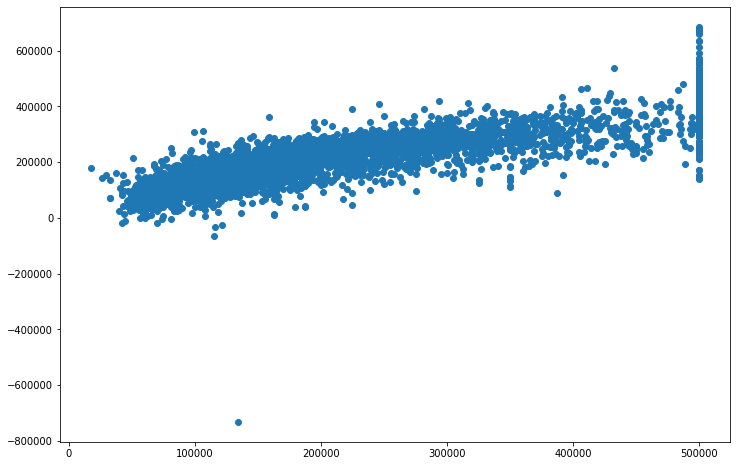

In [16]:
fig,ax = plt.subplots(figsize=(12,8))

plt.scatter(y_test,y_pred)
plt.show()

In [17]:
df_pred_actual_sample = df_pred_actual.sample(100)
df_pred_actual_sample = df_pred_actual_sample.reset_index()
df_pred_actual_sample.head()

,index,predicted,actual
0,1612,205324.276227,73400.0
1,3260,113835.979014,72500.0
2,9278,223250.590804,201600.0
3,16611,260894.031437,206900.0
4,4337,182809.965782,251100.0


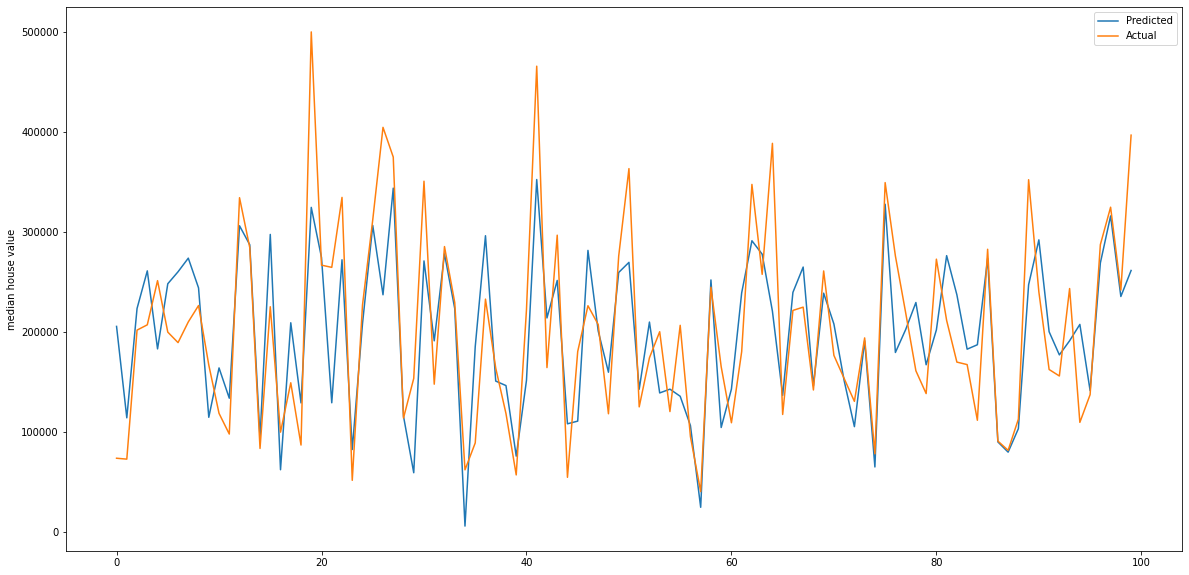

In [18]:
plt.figure(figsize = (20,10))
plt.plot(df_pred_actual_sample['predicted'],label='Predicted')
plt.plot(df_pred_actual_sample['actual'],label='Actual')
plt.ylabel('median house value')
plt.legend()
plt.show()
